# Load data 

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from IPython.display import clear_output
from tqdm import trange
import pandas as pd
from tensorflow import keras
import numpy as np ## For numerical python
np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# plt.rc('figure', dpi=120) # set good resolution

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file


from google.colab import drive
drive.mount('/content/drive')

#read libsvm file and transform to numpy array
df, label = load_svmlight_file('/content/drive/My Drive/ass3/diabetes.txt')
label[label < 0] = 0
label = label.astype(int)
df = df.toarray()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.DataFrame(df)
df1.describe()

,0,1,2,3,4,5,6,7
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,-0.547641,0.215020,0.132877,-0.585122,-0.811349,-0.046421,-0.663641,-0.591971
std,0.396421,0.321333,0.317308,0.322267,0.272444,0.234997,0.282945,0.392008
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.882353,-0.005025,0.016393,-1.000000,-1.000000,-0.186289,-0.858455,-0.900000
50%,-0.647059,0.175879,0.180328,-0.535354,-0.927896,-0.046200,-0.748506,-0.733333
75%,-0.294118,0.409547,0.311475,-0.353535,-0.699173,0.090909,-0.531811,-0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# check NAN value
print([i for i in np.sum(df1.isna())])

[0, 0, 0, 0, 0, 0, 0, 0]


                0
count  768.000000
mean     0.651042
std      0.476951
min      0.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      1.000000
[0]


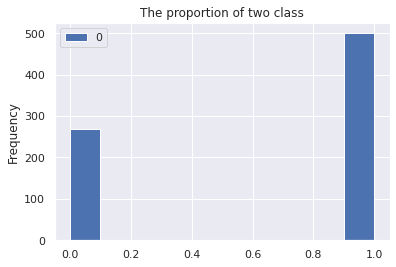

In [ ]:
label1 = pd.DataFrame(label)
print(label1.describe())

# check NAN value
print([i for i in np.sum(label1.isna())])

label1.plot(kind = 'hist',title ='The proportion of two class')

## split df into train set (70%), validation set (15%) and test set (15%)


In [ ]:
X_train,X_,y_train, y_ =sklearn.model_selection.train_test_split\
    (df,label,test_size=0.3, random_state=0,stratify=label)
X_test,X_val,y_test, y_val =sklearn.model_selection.train_test_split\
    (X_,y_,test_size=0.5, random_state=0,stratify=y_)

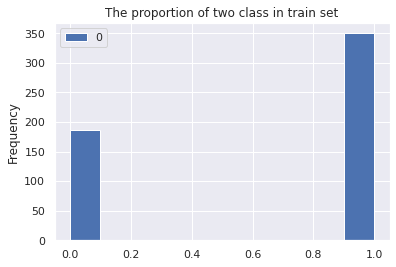

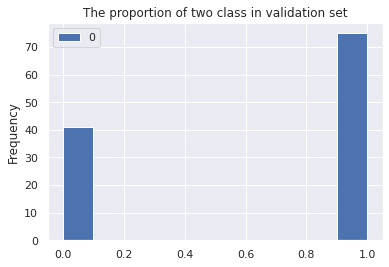

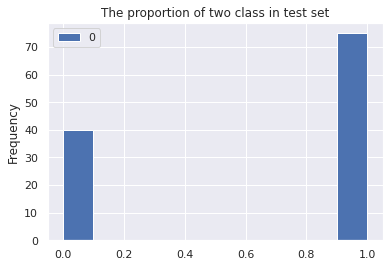

In [ ]:
pd.DataFrame(y_train).plot(kind = 'hist',title ='The proportion of two class in train set')
plt.show()
pd.DataFrame(y_val).plot(kind = 'hist',title ='The proportion of two class in validation set')
plt.show()
pd.DataFrame(y_test).plot(kind = 'hist',title ='The proportion of two class in test set')
plt.show()

# Building network

## full connected layer
$\frac{\partial H(PO)}{\partial PO} = q_i - p_i$

$\frac{\partial PO}{\partial f(s)} = W_{2}$

$\frac{\partial f(s)}{\partial s} = f(s)'$

$\frac{\partial s}{\partial W_{1}} = X$

$\frac{\partial H(PO)}{\partial W_{1}}=(q_i - p_i)*W_{2}*f(s)'*X$


update $W_{1}$

$W_{1new}=W_{1old}-\eta *\frac{\partial H(PO)}{\partial W_{1}}$

 

In [ ]:
class Layer:

  
    def __init__(self):
        
        pass

    def forward(self, input):
        
        return input

    def backward(self, input, grad_output):
        
        num_units = input.shape[1]

        d = np.eye(num_units)

        return np.dot(grad_output, d)  # chain rule


class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.1):
        # f(x) = <W*x> + b

        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc=0.0,
                                        scale=np.sqrt(2 / (input_units + output_units)),
                                        size=(input_units, output_units))
        self.biases = np.zeros(output_units)

    def forward(self, input):
        # f(x) = <W*x> + b

        # input shape: [batch, input_units]
        # output shape: [batch, output units]

        return np.dot(input, self.weights) + self.biases

    def backward(self, input, grad_output):
        '''grad_add_up is the cumulative product of the 
         gradient of the loss function to the gradient of this layer， 
         which is used for the next round of backpropagation
         $\frac{\partial H(PO)}{\partial W_{1}}=(q_i - p_i)*W_{2}*f(s)'*X$'''
        grad_add_up = np.dot(grad_output, self.weights.T)

        # compute gradient w.r.t. weights and biases
        # $\frac{\partial s}{\partial W_{1}} = X$
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis=0) * input.shape[0]

        # $W_{1new}=W_{1old}-\eta *\frac{\partial H(PO)}{\partial W_{1}}$
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases

        return grad_add_up






##activation function

In [ ]:
class ReLU(Layer):
    def __init__(self):
        pass

    def forward(self, input):
        relu_forward = np.maximum(0, input)
        return relu_forward

    def backward(self, input, grad_output):
        relu_grad = input > 0
        return grad_output * relu_grad

class Sigmoid(Layer):
    def __init__(self):
        pass

    def forward(self, input):
        return 1./(1.+np.exp(input))
        # return relu_forward

    def backward(self, input,grad_output):
        s = 1 / (1 + np.exp(-input))
        ds = s * (1 - s)
        return grad_output*ds


class Tanh(Layer):
    def __init__(self):
        pass

    def forward(self, input):
        return np.tanh(input)

    def backward(self, input,grad_output):
        ds =  1/(np.cosh(input)**2)
        # print(output,output.shape)
        return grad_output*ds

## Loss function
$H$ is the cross-entropy value: 
$H(P,Q)=-\sum_{x}^{} P(x)Log(Q(x))$


The cross-entropy describes the distance between two probability distribution vectors, the formula P is the probability distribution vector of the true value, Q is the probability distribution vector of the predicted value of the network, assuming that the feedforward neural network is used to solve the three classification problems, Q is [0.1,0.1,0.8], the probability of the largest is the true answer, P is [0,0,1]
$H= 0*log(0.1)+0*log(0.1)+1*log(0.8)$
Cross entropy is generally used with softmax regression, softtmax regression converts the output value of the neural network into a probability distribution vector.

The softmax function transforms a vector of K real values into a vector with a sum of K real values of 1. The input values can be positive, negative, zero, or greater than 1, but softmax transforms them into values between 0 and 1 so that they can be interpreted as probabilities.
$q_i = \frac{e^{q_i}}{\sum_{k=1}^N e^q_k}$


Derivative of Cross Entropy Loss with Softmax

$\frac{\partial H(P,Q)}{\partial o_i} = q_i - p_i$



In [ ]:
def softmax_crossentropy_with_logits(predict_answer, right_answers):
    prob_right_answers = predict_answer[np.arange(len(predict_answer)), right_answers]

    entropy = - prob_right_answers + np.log(np.sum(np.exp(predict_answer), axis=-1))

    return entropy

def grad_softmax_crossentropy_with_logits(logits, right_answers):
    right_answers_one_hot = np.zeros_like(logits) #Initialize matrix
    # because P(x) is [0,1] or [1,0], 1 means the right answer ,only select the answer with right answer and one hot encode it  
    right_answers_one_hot[np.arange(len(logits)), right_answers] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1, keepdims=True) #$q_i = \frac{e^{q_i}}{\sum_{k=1}^N e^q_k}$


    
    return (- right_answers_one_hot + softmax) / logits.shape[0]# $\frac{\partial H(P,Q)}{\partial o_i} = q_i - p_i$








## forward propagation and backword propagation

In [ ]:
def forward_propagation(network, X):
   

    activations = []
    input = X
    # Looping through each layer
    for l in network:
        activations.append(l.forward(input))
        # Updating input to last layer output
        input = activations[-1]

    assert len(activations) == len(network)
    return activations


def predict(network, X):
    logits = forward_propagation(network, X)[-1]
    return logits.argmax(axis=-1)


def train(network, X, y):
   
    layer_activations = forward_propagation(network, X)
    layer_inputs = [X] + layer_activations  
    ''' layer_input[i] is an input for network[i], 
     add input X as the first for calculating the gradient'''
    logits = layer_activations[-1] #output of the whole network

    loss = softmax_crossentropy_with_logits(logits, y)
    loss_grad = grad_softmax_crossentropy_with_logits(logits, y)

    # backword propagation
    for layer_index in range(len(network))[::-1]:
        # print(layer_index)
        layer = network[layer_index]
        # print(loss_grad,loss_grad.shape)
        loss_grad = layer.backward(layer_inputs[layer_index], loss_grad)  # grad w.r.t. input, also weight updates

    return np.mean(loss)




def get_minibatches(inputs, targets, batchsize):
   
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        
        excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

# Train the network

In [40]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from IPython.display import clear_output
from tqdm import trange


from tensorflow import keras

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()
# plt.rc('figure', dpi=120) # set good resolution

from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import load_svmlight_file


from google.colab import drive
drive.mount('/content/drive')


df, label = load_svmlight_file('/content/drive/My Drive/ass3/diabetes.txt')
label[label < 0] = 0
label = label.astype(int)
df = df.toarray()
X_train,X_,y_train, y_ =sklearn.model_selection.train_test_split\
    (df,label,test_size=0.3, random_state=0,stratify=label)
X_test,X_val,y_test, y_val =sklearn.model_selection.train_test_split\
    (X_,y_,test_size=0.5, random_state=0,stratify=y_)

import numpy as np ## For numerical python
np.random.seed(42)


class Layer:

  
    def __init__(self):
        
        pass

    def forward(self, input):
        
        return input

    def backward(self, input, grad_output):
        
        num_units = input.shape[1]

        d = np.eye(num_units)

        return np.dot(grad_output, d)  # chain rule

class ReLU(Layer):
    def __init__(self):
        pass

    def forward(self, input):
        relu_forward = np.maximum(0, input)
        return relu_forward

    def backward(self, input, grad_output):
        relu_grad = input > 0
        return grad_output * relu_grad

class Sigmoid(Layer):
    def __init__(self):
        pass

    def forward(self, input):
        return 1./(1.+np.exp(input))
        # return relu_forward

    def backward(self, input,grad_output):
        s = 1 / (1 + np.exp(-input))
        ds = s * (1 - s)
        return grad_output*ds


class Tanh(Layer):
    def __init__(self):
        pass

    def forward(self, input):
        return np.tanh(input)

    def backward(self, input,grad_output):
        ds =  1/(np.cosh(input)**2)
        # print(output,output.shape)
        return grad_output*ds

class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.1):
        # f(x) = <W*x> + b

        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc=0.0,
                                        scale=np.sqrt(2 / (input_units + output_units)),
                                        size=(input_units, output_units))
        self.biases = np.zeros(output_units)

    def forward(self, input):
        # f(x) = <W*x> + b

        # input shape: [batch, input_units]
        # output shape: [batch, output units]

        return np.dot(input, self.weights) + self.biases

    def backward(self, input, grad_output):
        
        grad_add_up = np.dot(grad_output, self.weights.T)

        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis=0) * input.shape[0]


        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases

        return grad_add_up


def softmax_crossentropy_with_logits(predict_answer, right_answers):
    prob_right_answers = predict_answer[np.arange(len(predict_answer)), right_answers]

    entropy = - prob_right_answers + np.log(np.sum(np.exp(predict_answer), axis=-1))

    return entropy

def grad_softmax_crossentropy_with_logits(logits, right_answers):
    right_answers_one_hot = np.zeros_like(logits)
    right_answers_one_hot[np.arange(len(logits)), right_answers] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1, keepdims=True)

    return (- right_answers_one_hot + softmax) / logits.shape[0]





def forward_propagation(network, X):
   

    activations = []
    input = X
    # Looping through each layer
    for l in network:
        activations.append(l.forward(input))
        # Updating input to last layer output
        input = activations[-1]

    assert len(activations) == len(network)
    return activations


def predict(network, X):
    logits = forward_propagation(network, X)[-1]
    return logits.argmax(axis=-1)


def train(network, X, y):
   
    layer_activations = forward_propagation(network, X)
    layer_inputs = [X] + layer_activations  # layer_input[i] is an input for network[i]
    logits = layer_activations[-1]

    loss = softmax_crossentropy_with_logits(logits, y)
    loss_grad = grad_softmax_crossentropy_with_logits(logits, y)

    
    for layer_index in range(len(network))[::-1]:
        # print(layer_index)
        layer = network[layer_index]
        # print(loss_grad,loss_grad.shape)
        loss_grad = layer.backward(layer_inputs[layer_index], loss_grad)  

    return np.mean(loss)




def get_minibatches(inputs, targets, batchsize):
   
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        
        excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## result of Sigmoid

Epoch 1499
Train accuracy: 0.6517690875232774
Val accuracy: 0.646551724137931


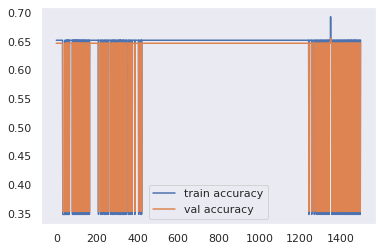

In [10]:
summarySig= []
for lr in [0.001,0.01,0.1]:
    for bat in [32,64,128]:
        print(lr,bat)
        network = []
        network.append(Dense(X_train.shape[1], 100, lr))
        network.append(Sigmoid())
        network.append(Dense(100, 200))
        network.append(Sigmoid())
        network.append(Dense(200, 2))

        train_record = []
        val_record = []
        for epoch in range(1500):
          for x_batch, y_batch in get_minibatches(np.array(X_train), np.array(y_train).ravel(), batchsize=bat):
              train(network, x_batch, y_batch)

          train_record.append(np.mean(predict(network, np.array(X_train)) == np.array(y_train).ravel()))
          val_record.append(np.mean(predict(network, np.array(X_val)) == np.array(y_val).ravel()))

          clear_output()
          print("Epoch", epoch)
          print("Train accuracy:", train_record[-1])
          print("Val accuracy:", val_record[-1])
        summarySig.append([bat,lr,train_record[-1],val_record[-1]])
        plt.plot(train_record, label='train accuracy')
        plt.plot(val_record, label='val accuracy')
        plt.legend(loc='best')
        plt.grid()
        
        fname = [bat,lr,"sig.png"]
        fname = "".join([str(_) for _ in fname])
        plt.savefig(fname, dpi=300)
        plt.show()

In [11]:
summarySig

[[32, 0.001, 0.6517690875232774, 0.646551724137931],
 [64, 0.001, 0.6517690875232774, 0.646551724137931],
 [128, 0.001, 0.6517690875232774, 0.646551724137931],
 [32, 0.01, 0.6517690875232774, 0.646551724137931],
 [64, 0.01, 0.6517690875232774, 0.646551724137931],
 [128, 0.01, 0.6517690875232774, 0.646551724137931],
 [32, 0.1, 0.6517690875232774, 0.646551724137931],
 [64, 0.1, 0.34823091247672255, 0.35344827586206895],
 [128, 0.1, 0.6517690875232774, 0.646551724137931]]

-----------------------------------------
Learning rate: 0.001 batch size: 32
320.001sig.png


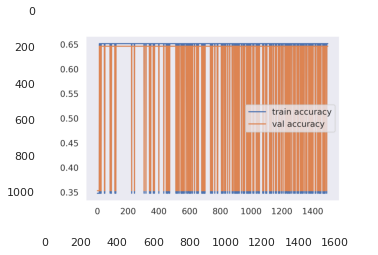

-----------------------------------------
Learning rate: 0.001 batch size: 64
640.001sig.png


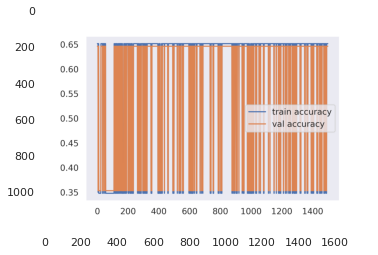

-----------------------------------------
Learning rate: 0.001 batch size: 128
1280.001sig.png


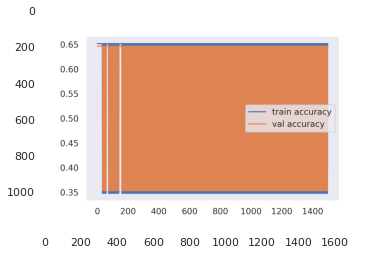

-----------------------------------------
Learning rate: 0.01 batch size: 32
320.01sig.png


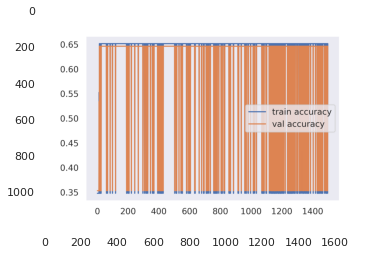

-----------------------------------------
Learning rate: 0.01 batch size: 64
640.01sig.png


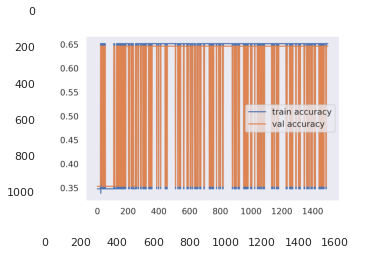

-----------------------------------------
Learning rate: 0.01 batch size: 128
1280.01sig.png


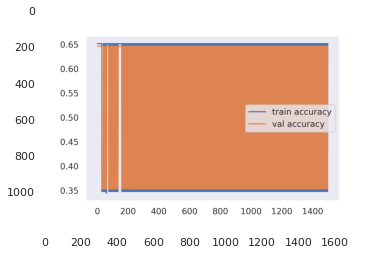

-----------------------------------------
Learning rate: 0.1 batch size: 32
320.1sig.png


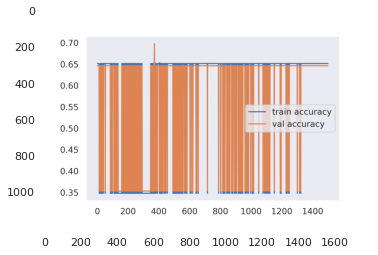

-----------------------------------------
Learning rate: 0.1 batch size: 64
640.1sig.png


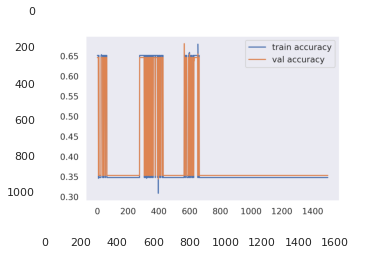

-----------------------------------------
Learning rate: 0.1 batch size: 128
1280.1sig.png


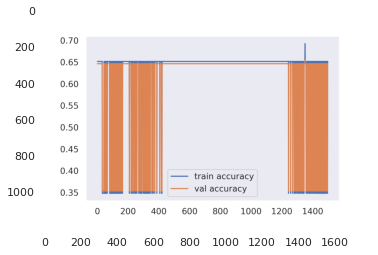

In [12]:
for lr in [0.001,0.01,0.1]:
    for bat in [32,64,128]:
      print("-----------------------------------------") 
      print('Learning rate:',lr,'batch size:',bat)
      fname = [bat,lr,"sig.png"]
      fname = "".join([str(_) for _ in fname])
      print(fname)
      image = plt.imread(fname)
      plt.grid()
      plt.imshow(image)
      plt.show()

## result of ReLU

Epoch 1499
Train accuracy: 0.8007448789571695
Val accuracy: 0.6637931034482759


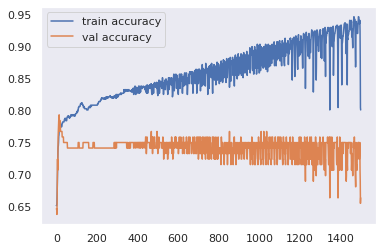

In [7]:
summaryRELU= []
for lr in [0.001,0.01,0.1]:
    for bat in [32,64,128]:
        print(lr,bat)
        network = []
        network.append(Dense(X_train.shape[1], 100, lr))
        network.append(ReLU())
        network.append(Dense(100, 200))
        network.append(ReLU())
        network.append(Dense(200, 2))

        train_record = []
        val_record = []
        for epoch in range(1500):
          for x_batch, y_batch in get_minibatches(np.array(X_train), np.array(y_train).ravel(), batchsize=bat):
              train(network, x_batch, y_batch)

          train_record.append(np.mean(predict(network, np.array(X_train)) == np.array(y_train).ravel()))
          val_record.append(np.mean(predict(network, np.array(X_val)) == np.array(y_val).ravel()))

          clear_output()
          print("Epoch", epoch)
          print("Train accuracy:", train_record[-1])
          print("Val accuracy:", val_record[-1])
        summaryRELU.append([bat,lr,train_record[-1],val_record[-1]])
        plt.plot(train_record, label='train accuracy')
        plt.plot(val_record, label='val accuracy')
        plt.legend(loc='best')
        plt.grid()
        
        fname = [bat,lr,"RELU.png"]
        fname = "".join([str(_) for _ in fname])
        plt.savefig(fname, dpi=300)
        plt.show()

In [8]:
summaryRELU

[[32, 0.001, 0.9422718808193669, 0.6896551724137931],
 [64, 0.001, 0.9143389199255121, 0.7672413793103449],
 [128, 0.001, 0.8640595903165735, 0.75],
 [32, 0.01, 0.9180633147113594, 0.646551724137931],
 [64, 0.01, 0.9590316573556797, 0.6982758620689655],
 [128, 0.01, 0.8733705772811918, 0.75],
 [32, 0.1, 0.9869646182495344, 0.7241379310344828],
 [64, 0.1, 0.9869646182495344, 0.7068965517241379],
 [128, 0.1, 0.8007448789571695, 0.6637931034482759]]

-----------------------------------------
Learning rate: 0.001 batch size: 32
320.001RELU.png


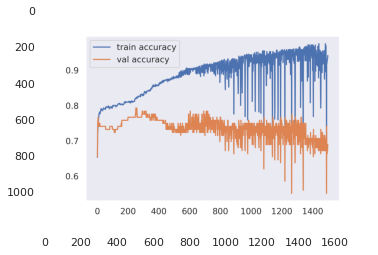

-----------------------------------------
Learning rate: 0.001 batch size: 64
640.001RELU.png


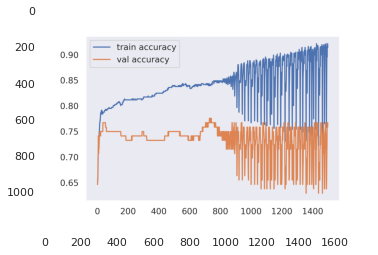

-----------------------------------------
Learning rate: 0.001 batch size: 128
1280.001RELU.png


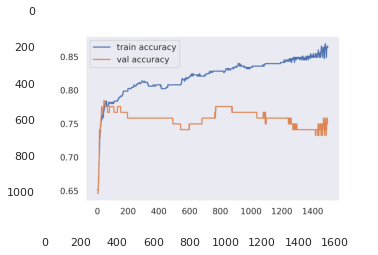

-----------------------------------------
Learning rate: 0.01 batch size: 32
320.01RELU.png


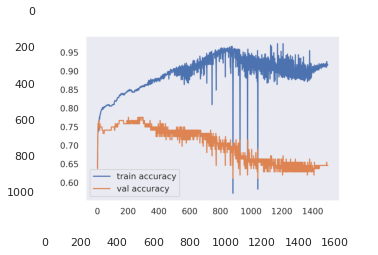

-----------------------------------------
Learning rate: 0.01 batch size: 64
640.01RELU.png


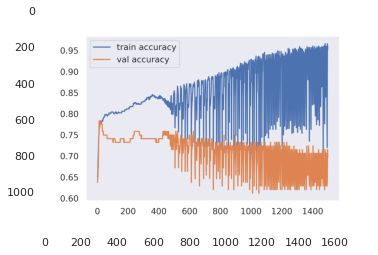

-----------------------------------------
Learning rate: 0.01 batch size: 128
1280.01RELU.png


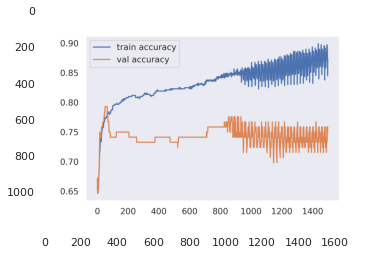

-----------------------------------------
Learning rate: 0.1 batch size: 32
320.1RELU.png


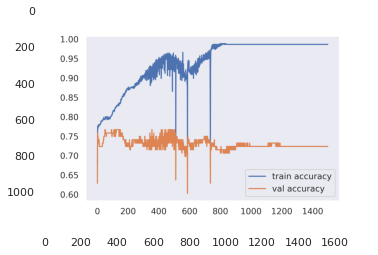

-----------------------------------------
Learning rate: 0.1 batch size: 64
640.1RELU.png


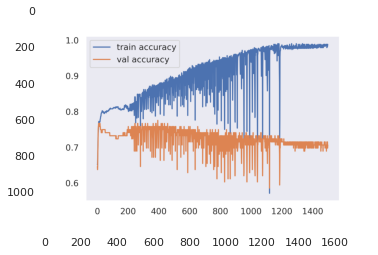

-----------------------------------------
Learning rate: 0.1 batch size: 128
1280.1RELU.png


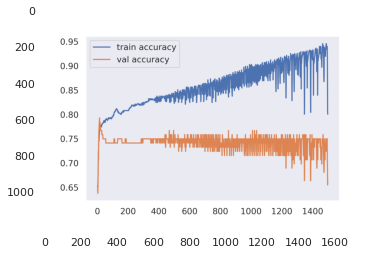

In [9]:
for lr in [0.001,0.01,0.1]:
    for bat in [32,64,128]:
      print("-----------------------------------------") 
      print('Learning rate:',lr,'batch size:',bat)
      fname = [bat,lr,"RELU.png"]
      fname = "".join([str(_) for _ in fname])
      print(fname)
      image = plt.imread(fname)
      plt.grid()
      plt.imshow(image)
      plt.show()

## result of Tanh

Epoch 1499
Train accuracy: 0.8249534450651769
Val accuracy: 0.75


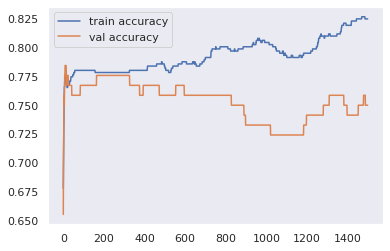

In [3]:
summary32 =summary64 =summary128 = []
for lr in [0.001,0.01,0.1]:
    for bat in [32,64,128]:
        print(lr,bat)
        network = []
        network.append(Dense(X_train.shape[1], 100, lr))
        network.append(Tanh())
        network.append(Dense(100, 200))
        network.append(Tanh())
        network.append(Dense(200, 2))

        train_record = []
        val_record = []
        for epoch in range(1500):
          for x_batch, y_batch in get_minibatches(np.array(X_train), np.array(y_train).ravel(), batchsize=bat):
              train(network, x_batch, y_batch)

          train_record.append(np.mean(predict(network, np.array(X_train)) == np.array(y_train).ravel()))
          val_record.append(np.mean(predict(network, np.array(X_val)) == np.array(y_val).ravel()))

          clear_output()
          print("Epoch", epoch)
          print("Train accuracy:", train_record[-1])
          print("Val accuracy:", val_record[-1])
        summary32.append([bat,lr,train_record[-1],val_record[-1]])
        plt.plot(train_record, label='train accuracy')
        plt.plot(val_record, label='val accuracy')
        plt.legend(loc='best')
        plt.grid()
        
        fname = [bat,lr,".png"]
        fname = "".join([str(_) for _ in fname])
        plt.savefig(fname, dpi=300)
        plt.show()
        # if bat == 32:
        #     summary32.append([lr,train_record[-1],val_record[-1]]), bbox_inches='tight'
        # if bat == 64:
        #     summary64.append([lr,train_record[-1],val_record[-1]])
        # if bat == 128:
        #     summary128.append([lr,train_record[-1],val_record[-1]])
        # Epoch 24
        # Train accuracy: 1.0
        # Val accuracy: 0.9809summary32 =summary64 =summary128 = []


In [4]:
summary32

[[32, 0.001, 0.8621973929236499, 0.7413793103448276],
 [64, 0.001, 0.8100558659217877, 0.7327586206896551],
 [128, 0.001, 0.7970204841713222, 0.7241379310344828],
 [32, 0.01, 0.9031657355679702, 0.6896551724137931],
 [64, 0.01, 0.8268156424581006, 0.7241379310344828],
 [128, 0.01, 0.8007448789571695, 0.7327586206896551],
 [32, 0.1, 0.9888268156424581, 0.6724137931034483],
 [64, 0.1, 0.9106145251396648, 0.6724137931034483],
 [128, 0.1, 0.8249534450651769, 0.75]]

-----------------------------------------
Learning rate: 0.001 batch size: 32
320.001.png


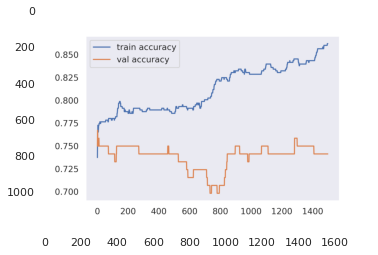

-----------------------------------------
Learning rate: 0.001 batch size: 64
640.001.png


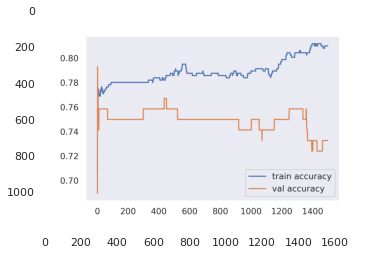

-----------------------------------------
Learning rate: 0.001 batch size: 128
1280.001.png


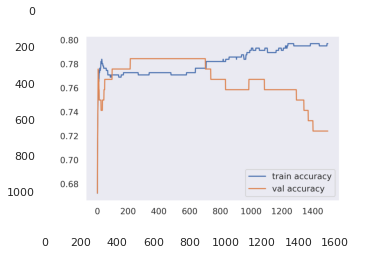

-----------------------------------------
Learning rate: 0.01 batch size: 32
320.01.png


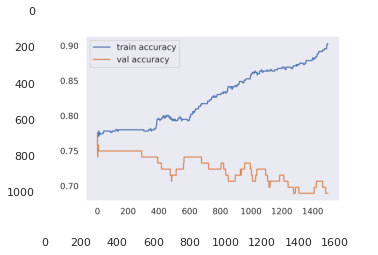

-----------------------------------------
Learning rate: 0.01 batch size: 64
640.01.png


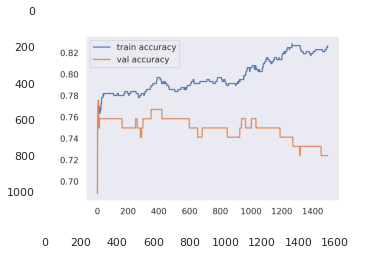

-----------------------------------------
Learning rate: 0.01 batch size: 128
1280.01.png


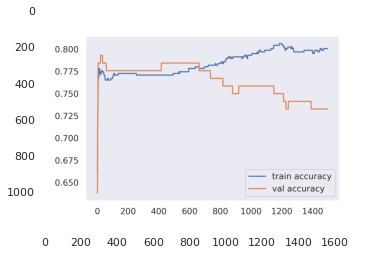

-----------------------------------------
Learning rate: 0.1 batch size: 32
320.1.png


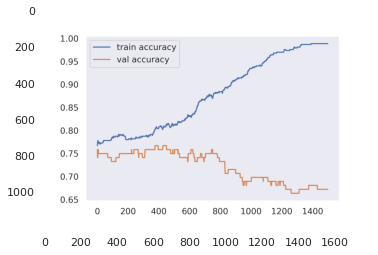

-----------------------------------------
Learning rate: 0.1 batch size: 64
640.1.png


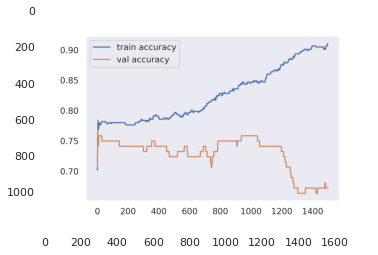

-----------------------------------------
Learning rate: 0.1 batch size: 128
1280.1.png


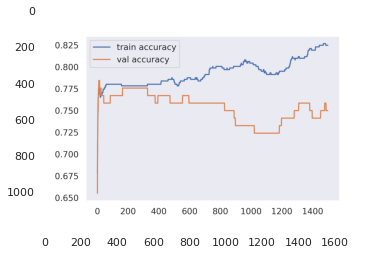

In [5]:
for lr in [0.001,0.01,0.1]:
    for bat in [32,64,128]:
      print("-----------------------------------------") 
      print('Learning rate:',lr,'batch size:',bat)
      fname = [bat,lr,".png"]
      fname = "".join([str(_) for _ in fname])
      print(fname)
      image = plt.imread(fname)
      plt.grid()
      plt.imshow(image)
      plt.show()

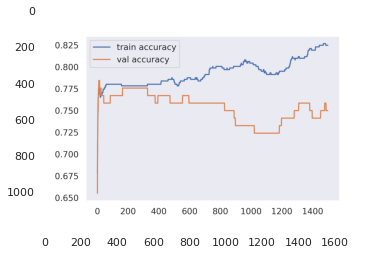

In [6]:
image = plt.imread("1280.1.png")
plt.grid()
plt.imshow(image)


## Network 1

Epoch 999
Train accuracy: 0.9441340782122905
Val accuracy: 0.7068965517241379


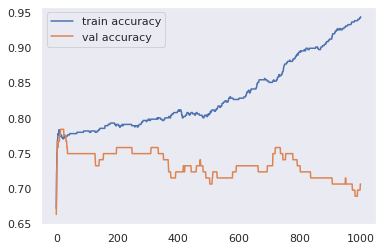

In [17]:
summaryal_tanh = []
for lr in [0.1]:
    for bat in [128]:
        print(lr,bat)
        network = []
        network.append(Dense(X_train.shape[1], 100, lr))
        network.append(Tanh())
        network.append(Dense(100, 100))
        network.append(Tanh())
        network.append(Dense(100, 100))
        network.append(Tanh())
        network.append(Dense(100, 100))
        network.append(Tanh())
        network.append(Dense(100, 2))

        train_record = []
        val_record = []
        for epoch in range(1000):
          for x_batch, y_batch in get_minibatches(np.array(X_train), np.array(y_train).ravel(), batchsize=bat):
              train(network, x_batch, y_batch)

          train_record.append(np.mean(predict(network, np.array(X_train)) == np.array(y_train).ravel()))
          val_record.append(np.mean(predict(network, np.array(X_val)) == np.array(y_val).ravel()))

          clear_output()
          print("Epoch", epoch)
          print("Train accuracy:", train_record[-1])
          print("Val accuracy:", val_record[-1])
        summaryal_tanh.append([bat,lr,train_record[-1],val_record[-1]])
        plt.plot(train_record, label='train accuracy')
        plt.plot(val_record, label='val accuracy')
        plt.legend(loc='best')
        plt.grid()
        
        fname = [bat,lr,"al.png"]
        fname = "".join([str(_) for _ in fname])
        plt.savefig(fname, dpi=300)
        plt.show()

## Network 2

Epoch 1499
Train accuracy: 0.8007448789571695
Val accuracy: 0.75


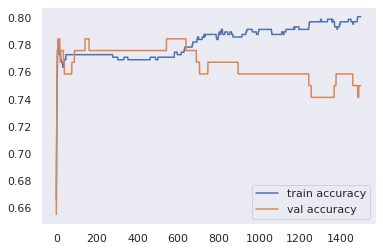

In [22]:
summary_tanh_an = []
for lr in [0.1]:
    for bat in [128]:#128
        print(lr,bat)
        network = []
        network.append(Dense(X_train.shape[1], 300, lr))
        network.append(Tanh())
        network.append(Dense(300, 300))
        network.append(Tanh())
        network.append(Dense(300, 2))

        train_record = []
        val_record = []
        for epoch in range(1500):#1000
          for x_batch, y_batch in get_minibatches(np.array(X_train), np.array(y_train).ravel(), batchsize=bat):
              train(network, x_batch, y_batch)

          train_record.append(np.mean(predict(network, np.array(X_train)) == np.array(y_train).ravel()))
          val_record.append(np.mean(predict(network, np.array(X_val)) == np.array(y_val).ravel()))

          clear_output()
          print("Epoch", epoch)
          print("Train accuracy:", train_record[-1])
          print("Val accuracy:", val_record[-1])
        summary_tanh_an.append([bat,lr,train_record[-1],val_record[-1]])
        plt.plot(train_record, label='train accuracy')
        plt.plot(val_record, label='val accuracy')
        plt.legend(loc='best')
        plt.grid()
        
        fname = [bat,lr,"an.png"]
        fname = "".join([str(_) for _ in fname])
        plt.savefig(fname, dpi=300)
        plt.show()

## Network 3

Epoch 999
Train accuracy: 0.8342644320297952
Val accuracy: 0.7586206896551724


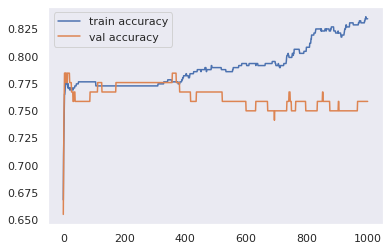

In [42]:
summary_tanh_500 = []
for lr in [0.1]:
    for bat in [128]:#128
        print(lr,bat)
        network = []
        network.append(Dense(X_train.shape[1], 500, lr))
        network.append(Tanh())
        network.append(Dense(500, 500))
        network.append(Tanh())
        network.append(Dense(500, 200))
        network.append(Tanh())
        network.append(Dense(200, 2))

        train_record = []
        val_record = []
        for epoch in range(1000):#1500 
          for x_batch, y_batch in get_minibatches(np.array(X_train), np.array(y_train).ravel(), batchsize=bat):
              train(network, x_batch, y_batch)

          train_record.append(np.mean(predict(network, np.array(X_train)) == np.array(y_train).ravel()))
          val_record.append(np.mean(predict(network, np.array(X_val)) == np.array(y_val).ravel()))

          clear_output()
          print("Epoch", epoch)
          print("Train accuracy:", train_record[-1])
          print("Val accuracy:", val_record[-1])
        summary_tanh_500.append([bat,lr,train_record[-1],val_record[-1]])
        plt.plot(train_record, label='train accuracy')
        plt.plot(val_record, label='val accuracy')
        plt.legend(loc='best')
        plt.grid()
        
        fname = [bat,lr,"500.png"]
        fname = "".join([str(_) for _ in fname])
        plt.savefig(fname, dpi=300)
        plt.show()

## Testing the network 3

In [61]:
# print("Testing accuracy is:")
result = predict(network, np.array(X_test))
result
# np.mean(result == np.array(y_train).ravel())  

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1])

The F1 score is:
0.8311688311688312


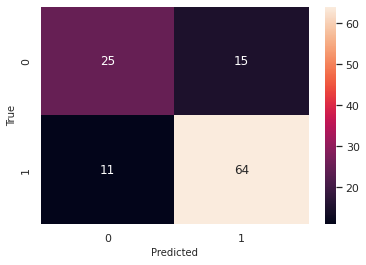

In [72]:
import seaborn as sn
print("The F1 score is:")
print(sklearn.metrics.f1_score(y_test,result))
cm = sklearn.metrics.confusion_matrix(y_test,result)
s = sn.heatmap(cm, annot=True)
s.set_xlabel('Predicted', fontsize=10)
s.set_ylabel('True', fontsize=10)
plt.show()